# Optimization Problems

In [81]:

%load_ext autoreload
%autoreload 2
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose_a2 as mlrose
import numpy as np
import matplotlib.pyplot as plt
from time import perf_counter as pc
import itertools
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
# from GridSearch_mlrose import GridSearch

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [41]:
def plot_curr_prob(curr_prob_df, optimum_line = None, savefig = None):
    fig, ax_fitness = plt.subplots()
    ax_fitness.set_xlabel("param_problem_length")
    ax_fitness.set_ylabel("mean_best_fitness")

    fig, ax_f_evals = plt.subplots()
    ax_f_evals.set_xlabel("param_problem_length")
    ax_f_evals.set_ylabel("mean_fitness_evals")

    fig, ax_f_evals_best = plt.subplots()
    ax_f_evals_best.set_xlabel("param_problem_length")
    ax_f_evals_best.set_ylabel("mean_fitness_evals_to_best")

    fig, ax_time = plt.subplots()
    ax_time.set_xlabel("param_problem_length")
    ax_time.set_ylabel("mean_time")

    fig, ax_time_f_evals = plt.subplots()
    ax_time_f_evals.set_xlabel("mean_fitness_evals")
    ax_time_f_evals.set_ylabel("mean_time")

    mrk_lst = ['o','s','v','d','^']
    mrk_count = 0
    for algo_name in sorted(curr_prob_df):
        df = curr_prob_df[algo_name]

        ax_fitness.plot(df['param_problem_length'], df['mean_best_fitness'], ls='-', marker=mrk_lst[mrk_count], label=algo_name)
        ax_f_evals.plot(df['param_problem_length'], df['mean_fitness_evals'], ls='-', marker=mrk_lst[mrk_count], label=algo_name)
        ax_f_evals_best.plot(df['param_problem_length'], df['mean_fitness_evals_to_best_state'], ls='-', marker=mrk_lst[mrk_count], label=algo_name)
        ax_time.plot(df['param_problem_length'], df['mean_time'], ls='-', marker=mrk_lst[mrk_count], label=algo_name)
        ax_time_f_evals.plot(df['mean_fitness_evals'], df['mean_time'], ls='-', marker=mrk_lst[mrk_count], label=algo_name)
        mrk_count += 1
    if optimum_line is not None:
        optimum_line = np.asarray(optimum_line)
        ax_fitness.plot(optimum_line[:, 0], optimum_line[:, 1], ls=':', color='k', label="Optimum")

    # 0 for y axis min, most of the time...
    ax_f_evals.set_ylim([0, None])
    ax_f_evals_best.set_ylim([0, None])
    ax_time.set_ylim([0, None])
    ax_time_f_evals.set_ylim([0, None])

    # Set f_eval plots to same scale
    ax_f_evals_best.set_ylim(ax_f_evals.get_ylim())


    ax_fitness.set(xlabel='Problem Complexity (in length)', ylabel='Average Best Fitness Score')
    ax_f_evals.set(xlabel='Problem Complexity (in length)', ylabel='Average Evaluation Iterations')
    ax_f_evals_best.set(xlabel='Problem Complexity (in length)', ylabel='Average Evalution Iterations for Optimal')
    ax_time.set(xlabel='Problem Complexity (in length)', ylabel='Search Time (s)')
    ax_time_f_evals.set(xlabel='Average Evaluation Iterations', ylabel='Search Time (s)')

    ax_fitness.get_figure().tight_layout()
    ax_f_evals.get_figure().tight_layout()
    ax_f_evals_best.get_figure().tight_layout()
    ax_time.get_figure().tight_layout()
    ax_time_f_evals.get_figure().tight_layout()

    ax_fitness.legend()
    ax_f_evals.legend()
    ax_f_evals_best.legend()
    ax_time.legend()
    ax_time_f_evals.legend()

    if savefig is not None:
        ax_fitness.get_figure().savefig(f'{savefig}_fitness_.png')
        ax_f_evals.get_figure().savefig(f'{savefig}_f_evals_.png')
        ax_f_evals_best.get_figure().savefig(f'{savefig}_f_evals_best_.png')
        ax_time.get_figure().savefig(f'{savefig}_time_.png')
        ax_time_f_evals.get_figure().savefig(f'{savefig}_time_f_evals_.png')

    plt.plot()

In [36]:
iters = 5
def run_experiment(fitness_fn):
    curr_prob = {}    

    curr_prob_domain = {'fitness_fn': fitness_fn,
                          'max_val': 2,
                          'length': [5,10,20,50,100]
                         }
    problem = mlrose.DiscreteOpt

    all_algo = {
        'MIMIC': {
            'algorithm': mlrose.mimic,
            'param_grid_algorithm': {'return_statistics':True, 'pop_size': ['problem_length'], 'keep_pct': [0.2,.4], 'max_attempts': [25], 'max_iters': 100},
        },
        'Hill Climbing': {
            'algorithm': mlrose.random_hill_climb,
            'param_grid_algorithm': {'return_statistics':True,'restarts': 5},
        },

        'Simulated Annealing': {
            'algorithm': mlrose.simulated_annealing,
            'param_grid_algorithm': {'return_statistics':True,'max_attempts': 100},
        },
        'Genetic Algorithm': {
            'algorithm': mlrose.genetic_alg,
            'param_grid_algorithm': {'return_statistics':True,'pop_size': ['5*problem_length'], 'mutation_prob': [0.1,.2,.4,.6], 'max_attempts': 10},
        },
    }

    for k, d in all_algo.items():
        d['problem'] = problem
        d['curr_prob_domain'] = curr_prob_domain


    for algo_name, curr_algo_set in all_algo.items():
        print(f"Current algorithm: {algo_name}")
        gs = mlrose.GridSearch(algorithm=curr_algo_set['algorithm'], param_grid_algorithm=curr_algo_set['param_grid_algorithm'], 
                               problem=curr_algo_set['problem'], curr_prob_domain=curr_algo_set['curr_prob_domain'], iters=iters)
        gs.evaluate()
        curr_prob[algo_name] = gs.curr_prob
    curr_prob_format = {k: pd.DataFrame(r) for k, r in curr_prob.items()}
    optimal = [(l, l-1) for l in list(curr_prob_domain['length'])]
    return curr_prob_format,optimal

In [37]:
fitness_fn = mlrose.FlipFlop()
curr_prob_format,optimal = run_experiment(fitness_fn)
plot_curr_prob(curr_prob_format, optimum_line=optimum)

Current algorithm: MIMIC
Running case 1/10: iteration 0
MIMIC finished after using 25/25 attempts, 26/100, iters
Running case 1/10: iteration 1
MIMIC finished after using 25/25 attempts, 26/100, iters
Running case 1/10: iteration 2
MIMIC finished after using 25/25 attempts, 26/100, iters
Running case 1/10: iteration 3
MIMIC finished after using 25/25 attempts, 26/100, iters
Running case 1/10: iteration 4
MIMIC finished after using 25/25 attempts, 26/100, iters
Running case 2/10: iteration 0
MIMIC finished after using 25/25 attempts, 25/100, iters
Running case 2/10: iteration 1
MIMIC finished after using 25/25 attempts, 26/100, iters
Running case 2/10: iteration 2
MIMIC finished after using 25/25 attempts, 26/100, iters
Running case 2/10: iteration 3
MIMIC finished after using 25/25 attempts, 25/100, iters
Running case 2/10: iteration 4
MIMIC finished after using 25/25 attempts, 26/100, iters
Running case 3/10: iteration 0
MIMIC finished after using 25/25 attempts, 25/100, iters
Running

NameError: name 'optimum' is not defined

In [31]:
optimal

[(20, 19), (40, 39), (60, 59), (80, 79), (100, 99), (120, 119)]

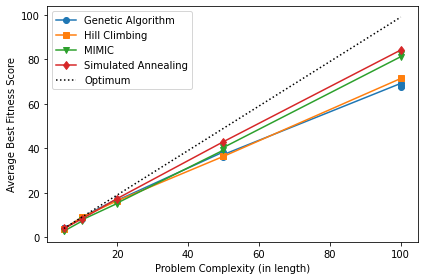

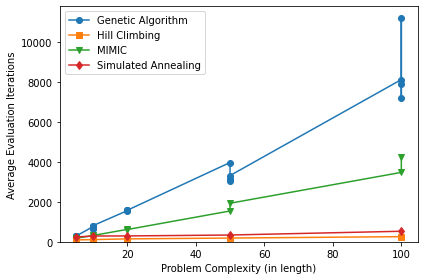

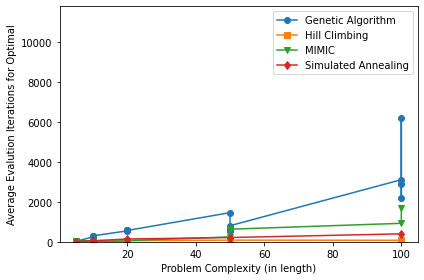

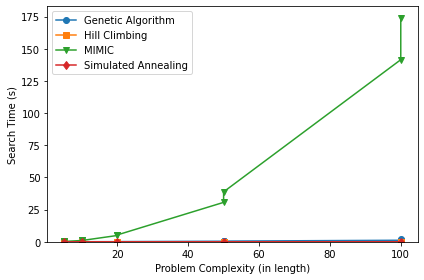

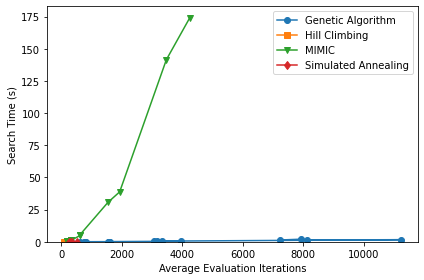

In [43]:
plot_curr_prob(curr_prob_format, optimum_line=optimal,savefig = 'FF')

In [46]:
# import sklearn.external.joblib as extjoblib
import joblib
fname = 'FF_results.pkl'
joblib.dump(curr_prob_format, fname)

['FF_results.pkl']

# Neural Network training

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics
from sklearn.model_selection import GridSearchCV,cross_val_score
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import time
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import itertools
from sklearn.neural_network import MLPClassifier
from time import perf_counter
from sklearn.metrics import f1_score

from sklearn.metrics import accuracy_score
import mlrose_a2 as mlrose
from sklearn.model_selection import cross_val_score

In [48]:

df = pd.read_csv('UniversalBank.csv')
df.head(10)
df.drop(['ID','ZIP Code'],axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   Family              5000 non-null   int64  
 4   CCAvg               5000 non-null   float64
 5   Education           5000 non-null   int64  
 6   Mortgage            5000 non-null   int64  
 7   Personal Loan       5000 non-null   int64  
 8   Securities Account  5000 non-null   int64  
 9   CD Account          5000 non-null   int64  
 10  Online              5000 non-null   int64  
 11  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 468.9 KB


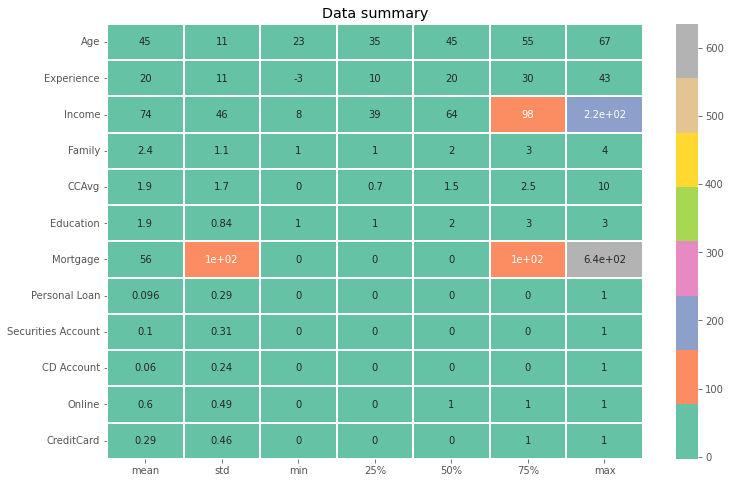

In [49]:
plt.figure(figsize=(12,8))
sns.heatmap(df.describe()[1:].transpose(),
            annot=True,linecolor="w",
            linewidth=2,cmap=sns.color_palette("Set2"))
plt.title("Data summary")
plt.show()

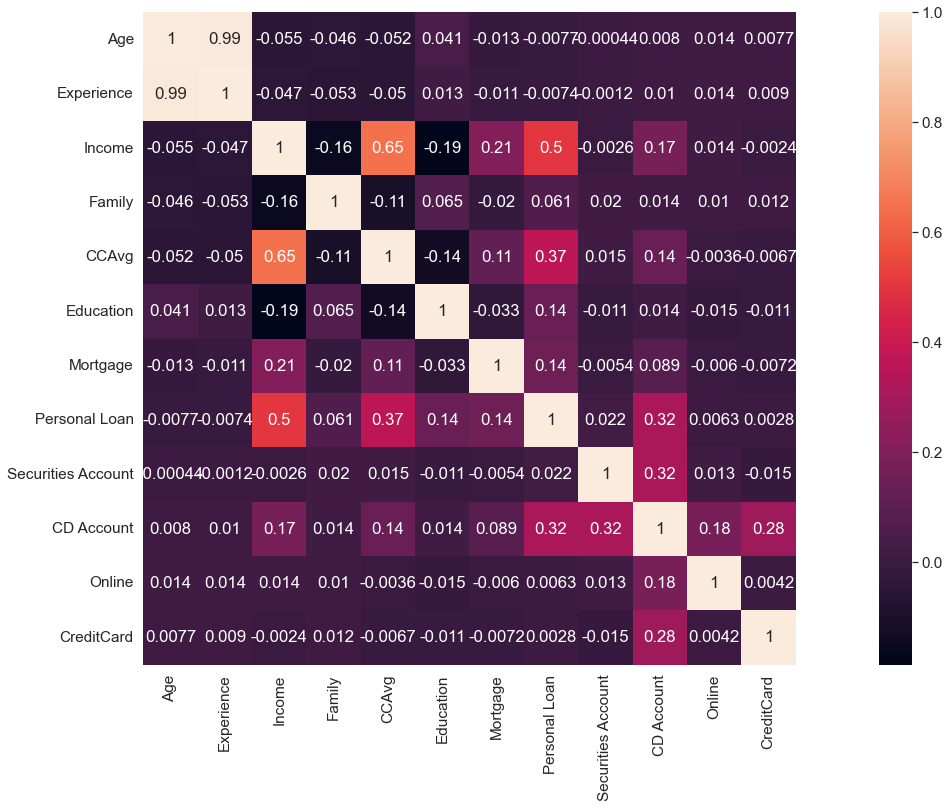

In [51]:
cor_mat= df[:].corr()
# mask = np.array(cor_mat)
# mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,square=True,annot=True,cbar=True)
sns.set(font_scale=1.4)
fig.savefig('corr.png',dpi=fig.dpi)
plt.show()

In [52]:
X = df.drop('Personal Loan',axis=1)
y = df['Personal Loan']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

# Backpropgation

In [96]:
clf = MLPClassifier(hidden_layer_sizes=(9,9), activation = 'relu', max_iter=1000, solver = 'lbfgs' )
time_start = perf_counter()
clf.fit(X_train, y_train)
fit_time = perf_counter() - time_start
print(f'Train: fit_time = {fit_time}')

Train: fit_time = 1.9274305310027557


In [97]:

time_start = perf_counter()
y_pred = clf.predict(X_test)
fit_time = perf_counter() - time_start
print (f'Test: fit_time = {fit_time}')

#Evaulation
print(accuracy_score(y_test, y_pred))
print (classification_report(y_test, y_pred))

Test: fit_time = 0.0022796800003561657
0.973
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       910
           1       0.91      0.78      0.84        90

    accuracy                           0.97      1000
   macro avg       0.94      0.89      0.91      1000
weighted avg       0.97      0.97      0.97      1000



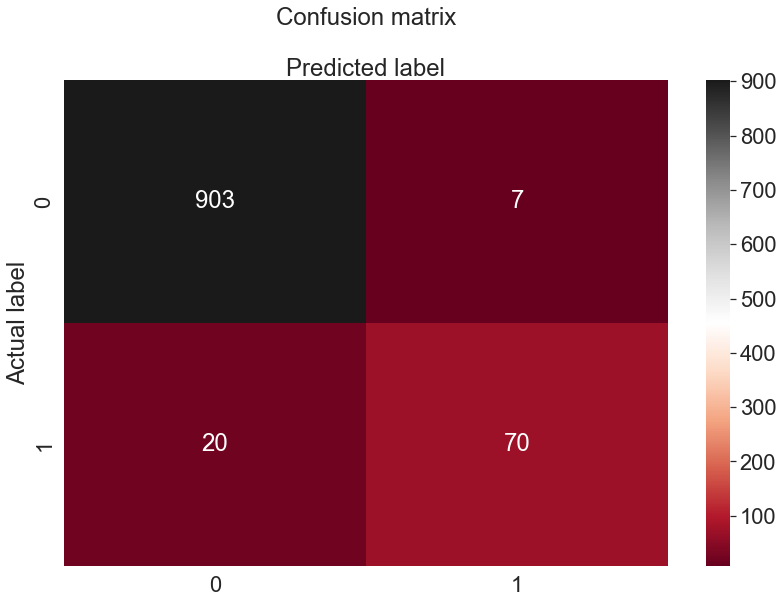

In [98]:
sns.set(font_scale=2)
class_names=[0,1] # name  of classes
cm = confusion_matrix(y_test,y_pred)
fig, ax =  plt.subplots(figsize=(12,9))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="RdGy" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
fig.tight_layout()
fig.savefig('back.png',dpi=fig.dpi)
plt.show()

# RHC

In [109]:
np.random.seed(12345)
act_list = ['relu','tanh','sigmoid']
lr_list = [.01,.1,.2,.5]
hidden_list = [2,3,5,8]
hc_best_score = 0
for hn in hidden_list:
    print('hidden',hn)
    for lr in lr_list:
        print('lr:',lr)
        for act in act_list:
            clf_hill = mlrose.NeuralNetwork(hidden_nodes = [hn], activation = act, 
                                            algorithm = 'random_hill_climb', 
                                            max_iters=1000, bias = True, is_classifier = True, 
                                            learning_rate = lr, early_stopping = True, clip_max = 5, 
                                            max_attempts = 100)
            time_start = perf_counter()
            clf_hill.fit(X_train, y_train)
            y_train_ = clf_hill.predict(X_train)
            train_score = accuracy_score(y_train, y_train_)
            if train_score >= hc_best_score:
                hc_best_score = train_score
                hc_best_hill = clf_hill
                hc_best_time = perf_counter() - time_start
                hc_best_para = [hn,lr,act]

print(f'fit_time = {best_time}')

hidden 2
lr: 0.01
lr: 0.1
lr: 0.2
lr: 0.5
hidden 3
lr: 0.01
lr: 0.1
lr: 0.2
lr: 0.5
hidden 5
lr: 0.01
lr: 0.1
lr: 0.2
lr: 0.5
hidden 8
lr: 0.01
lr: 0.1
lr: 0.2
lr: 0.5
fit_time = 1.914677003001998


In [110]:

time_start = perf_counter()
y_pred = best_hill.predict(X_test)
fit_time = perf_counter() - time_start
print (f'Test: fit_time = {fit_time}')

#Evaulation
print(accuracy_score(y_test, y_pred))
print (classification_report(y_test, y_pred))

Test: fit_time = 0.0006880820001242682
0.935
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       910
           1       0.88      0.32      0.47        90

    accuracy                           0.94      1000
   macro avg       0.91      0.66      0.72      1000
weighted avg       0.93      0.94      0.92      1000



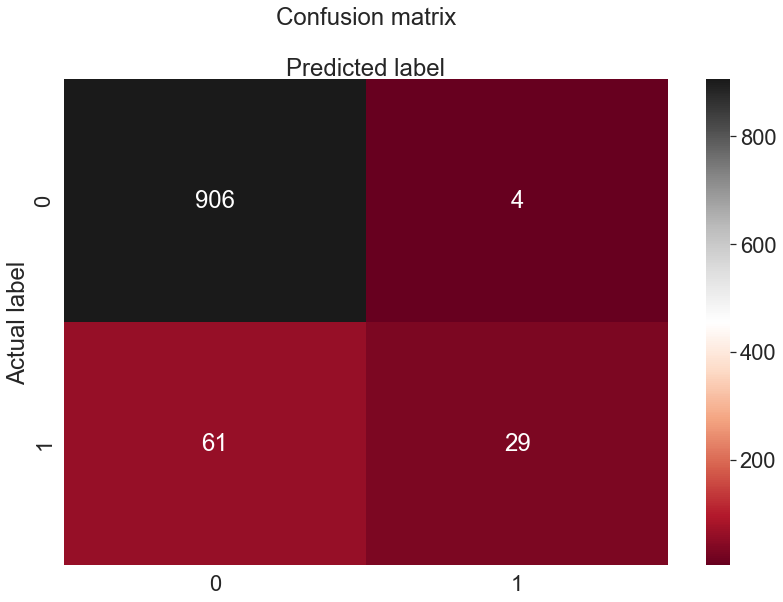

In [111]:
sns.set(font_scale=2)
class_names=[0,1] # name  of classes
cm = confusion_matrix(y_test,y_pred)
fig, ax =  plt.subplots(figsize=(12,9))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="RdGy" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
fig.tight_layout()
fig.savefig('rhc.png',dpi=fig.dpi)
plt.show()

# GA

In [66]:
import warnings
warnings.filterwarnings("ignore")

In [113]:
np.random.seed(12345)
act_list = ['relu','tanh']
lr_list = [.01,.1,.2]
hidden_list = [2,5,8]
ga_best_score = 0
for hn in hidden_list:
    print('hidden',hn)
    for lr in lr_list:
        print('lr:',lr)
        for act in act_list:
            clf_ga = mlrose.NeuralNetwork(hidden_nodes = [hn], activation = act, 
                                            algorithm = 'genetic_alg', 
                                            max_iters=1000, bias = True, is_classifier = True, 
                                            learning_rate = lr, early_stopping = True, clip_max = 5, 
                                            max_attempts = 100)
            time_start = perf_counter()
            clf_ga.fit(X_train, y_train)
            y_train_ = clf_ga.predict(X_train)
            train_score = accuracy_score(y_train, y_train_)
            if train_score >= ga_best_score:
                ga_best_score = train_score
                ga_best_ga = clf_ga
                ga_best_time = perf_counter() - time_start
                ga_best_para = [hn,lr,act]

print(f'fit_time = {ga_best_time}')

hidden 2
lr: 0.01
running with elite = 0.3
Search ended with attempts>max_attempts (100>100).  Iters=101
running with elite = 0.3
Search ended with attempts>max_attempts (100>100).  Iters=115
lr: 0.1
running with elite = 0.3
Search ended with attempts>max_attempts (100>100).  Iters=160
running with elite = 0.3
Search ended with attempts>max_attempts (100>100).  Iters=101
lr: 0.2
running with elite = 0.3
Search ended with attempts>max_attempts (100>100).  Iters=125
running with elite = 0.3
Search ended with attempts>max_attempts (100>100).  Iters=144
hidden 5
lr: 0.01
running with elite = 0.3
Search ended with attempts>max_attempts (100>100).  Iters=101
running with elite = 0.3
Search ended with attempts>max_attempts (100>100).  Iters=132
lr: 0.1
running with elite = 0.3
Search ended with attempts>max_attempts (100>100).  Iters=153
running with elite = 0.3
Search ended with attempts>max_attempts (100>100).  Iters=176
lr: 0.2
running with elite = 0.3
Search ended with attempts>max_attemp

In [117]:

time_start = perf_counter()
y_pred = ga_best_ga.predict(X_test)
fit_time = perf_counter() - time_start
print (f'Test: fit_time = {fit_time}')

#Evaulation
print(accuracy_score(y_test, y_pred))
print (classification_report(y_test, y_pred))

Test: fit_time = 0.0005500349980138708
0.91
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       910
           1       0.00      0.00      0.00        90

    accuracy                           0.91      1000
   macro avg       0.46      0.50      0.48      1000
weighted avg       0.83      0.91      0.87      1000



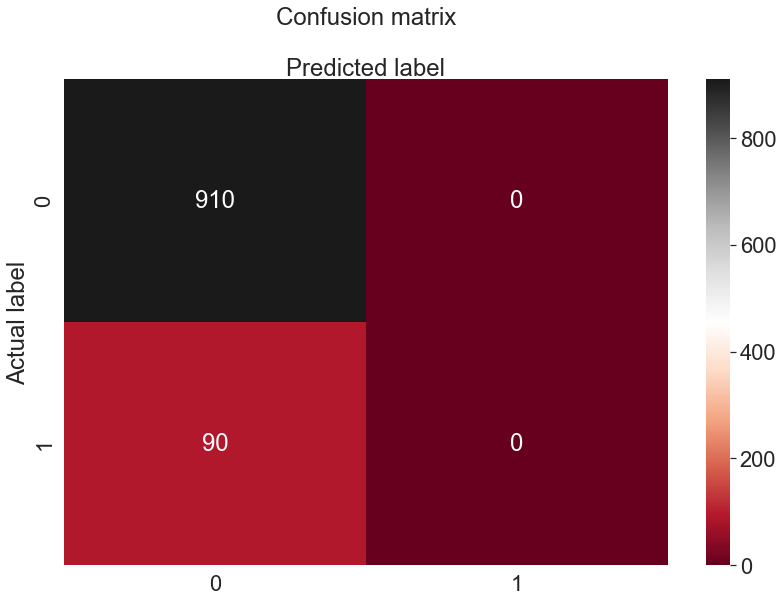

In [118]:
sns.set(font_scale=2)
class_names=[0,1] # name  of classes
cm = confusion_matrix(y_test,y_pred)
fig, ax =  plt.subplots(figsize=(12,9))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="RdGy" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
fig.tight_layout()
fig.savefig('ga.png',dpi=fig.dpi)
plt.show()

# SA

In [ ]:
np.random.seed(12345)
act_list = ['relu','tanh','sigmoid']
lr_list = [.01,.1,.2,.5]
hidden_list = [2,3,5,8]
sa_best_score = 0
for hn in hidden_list:
    print('hidden',hn)
    for lr in lr_list:
        print('lr:',lr)
        for act in act_list:
            clf_sa = mlrose.NeuralNetwork(hidden_nodes = [hn], activation = act, 
                                            algorithm = 'simulated_annealing', 
                                            max_iters=1000, bias = True, is_classifier = True, 
                                            learning_rate = lr, early_stopping = True, clip_max = 5, 
                                            max_attempts = 100)
            time_start = perf_counter()
            clf_sa.fit(X_train, y_train)
            y_train_ = clf_sa.predict(X_train)
            train_score = accuracy_score(y_train, y_train_)
            if train_score >= sa_best_score:
                sa_best_score = train_score
                sa_best = clf_sa
                sa_best_time = perf_counter() - time_start
                sa_best_para = [hn,lr,act]

print(f'fit_time = {sa_best_time}')

hidden 2
lr: 0.01
Search ended with attempts>max_attempts (1000>1000)
Search ended with attempts>max_attempts (1000>1000)
Search ended with attempts>max_attempts (1000>1000)
lr: 0.1
Search ended with attempts>max_attempts (100>100).  Iters=879
Search ended with attempts>max_attempts (1000>1000)
Search ended with attempts>max_attempts (1000>1000)
lr: 0.2
Search ended with attempts>max_attempts (1000>1000)
Search ended with attempts>max_attempts (1000>1000)
Search ended with attempts>max_attempts (1000>1000)
lr: 0.5
Search ended with attempts>max_attempts (1000>1000)
Search ended with attempts>max_attempts (1000>1000)
Search ended with attempts>max_attempts (1000>1000)
hidden 3
lr: 0.01


In [ ]:

time_start = perf_counter()
y_pred = sa_best.predict(X_test)
fit_time = perf_counter() - time_start
print (f'Test: fit_time = {fit_time}')

#Evaulation
print(accuracy_score(y_test, y_pred))
print (classification_report(y_test, y_pred))

In [ ]:
sns.set(font_scale=2)
class_names=[0,1] # name  of classes
cm = confusion_matrix(y_test,y_pred)
fig, ax =  plt.subplots(figsize=(12,9))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="RdGy" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
fig.tight_layout()
fig.savefig('sa.png',dpi=fig.dpi)
plt.show()